In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


In [2]:
# Nodes of the graph
path = "./ED_70_nodes.csv"
dfnodes = pd.read_csv(path, sep=",")

In [3]:
# Edges with different nodes
path = "./ED_70_Edges.csv"
dfedges = pd.read_csv(path, sep=",")

In [4]:
nodesList = list(dfnodes.Id)

In [5]:
dfedges.keys()

Index(['Source', 'Target'], dtype='object')

In [6]:
g=nx.Graph()

# Adding nodes
for nodes in nodesList:
    g.add_node(nodes)

# Adding edges
for source,target in zip(list(dfedges.Source),list(dfedges.Target)):
#     print(source,target)
    g.add_edge(source,target)
    


In [7]:
# Converting to undirected graph
G = g.to_undirected()

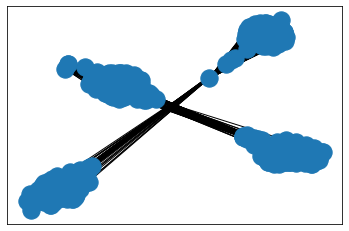

In [10]:

nx.draw_networkx(G,with_labels=False)

In [11]:
# dumping ED_70_graph
import pickle 
pickle.dump( G, open( "ED_70_graph.p", "wb" ) ) 

In [21]:
# Using FractionInfercted and Threshold to understand cascade network.
FractionInfected = [0.1,0.2]
Threshold = [0.25,0.75]
d = {}
for fraction_infected in FractionInfected:
    for threshold in Threshold:
        model = ep.ThresholdModel(G)
        # Model Configuration
        config = mc.Configuration()
        # fraction_infected (0.1,0.2)
        config.add_model_parameter('fraction_infected', fraction_infected)

        # Setting node parameters
        for i in G.nodes():
            config.add_node_configuration("threshold", i, threshold)

        model.set_initial_status(config)

        # Simulation execution
        iterations = model.iteration_bunch(200)
        key = "Fraction=" + str(fraction_infected)+ " Threshold="+str(threshold) + " 200thIteration"
        d[key] = iterations[-1]
#         print("Fraction:{} , Threshold:{}, Iterations_200:{}".format(fraction_infected,threshold,iterations[-1]))
    

100%|██████████| 200/200 [00:00<00:00, 329.22it/s]


In [22]:
# (e.g. 0.1, 0.25, 0.5, 0.75)
d

{'Fraction=0.1 Threshold=0.25 200thIteration': {'iteration': 199,
  'status': {},
  'node_count': {0: 351, 1: 38},
  'status_delta': {0: 0, 1: 0}},
 'Fraction=0.1 Threshold=0.75 200thIteration': {'iteration': 199,
  'status': {},
  'node_count': {0: 351, 1: 38},
  'status_delta': {0: 0, 1: 0}},
 'Fraction=0.2 Threshold=0.25 200thIteration': {'iteration': 199,
  'status': {},
  'node_count': {0: 87, 1: 302},
  'status_delta': {0: 0, 1: 0}},
 'Fraction=0.2 Threshold=0.75 200thIteration': {'iteration': 199,
  'status': {},
  'node_count': {0: 312, 1: 77},
  'status_delta': {0: 0, 1: 0}}}

In [14]:
print(type(iterations))
for i in range(0,len(iterations)):
    print(iterations[i])

<class 'list'>
{'iteration': 0, 'status': {'JudgeDread-BigSeven': 0, 'GramParsons-CryOneMoreTime': 1, "HankWilliams-MySweetLoveAin'tAround": 0, "TheKing'sSingers-Can'tBuyMeLove": 0, 'CharlieRich-LifeHasItsLittleUpsAndDowns': 0, 'RosanneCash-TheWheel': 1, 'SteveEarle-FearlessHeart': 0, 'JohnGorka-WhereTheBottlesBreak': 0, "MerleHaggard-It'sNotLove(ButIt'sNotBad)": 1, 'TheHouseOfLove-Ray': 0, 'BlindLemonJefferson-RamblerBlues': 0, 'MethodMan-PerfectWorld': 0, 'NovembersDoom-Awaken': 0, "Nonchalant-5O'Clock": 0, "Ol'DirtyBastard-Gettin'High": 0, 'TheDivineComedy-ThereIsALightThatNeverGoesOut': 0, 'Everlast-SoLong': 0, "ProdigyOfMobbDeep-Don'tBeAFollower": 0, 'RayPrice-HeartachesByTheNumber': 1, 'JohnCale-GhostStory': 0, 'TheLangleySchoolsMusicProject-GodOnlyKnows': 0, 'Hooverphonic-TheLastSupper': 1, 'DaynaKurtz-FredAstaire': 1, 'UncleTupelo-WhiskeyBottle': 1, 'MississippiFredMcDowell-61Highway': 0, 'GillianWelch-OneMonkey': 0, 'HowardShore-CirithUngol': 0, 'JorgeBen-CassiusMarcellusClay'